# A notebook with a simple Solow model 
You ca run each cell by pressing the run tool or shift+enter

# Import Python libraries

In [1]:
%matplotlib inline
import pandas as pd
from modelclass import model
model.modelflow_auto()

# Specify the model 
The explode function will rewrite the business logic.

In [2]:
fsolow = '''\
Y         = a * k**alfa * l **(1-alfa) 
C         = (1-SAVING_RATIO)  * Y 
I         = Y - C 
diff(K)   = I-depreciates_rate * K(-1)
diff(l)   = labor_growth * L(-1) 
K_intense = K/L 
'''
print(fsolow)

Y         = a * k**alfa * l **(1-alfa) 
C         = (1-SAVING_RATIO)  * Y 
I         = Y - C 
diff(K)   = I-depreciates_rate * K(-1)
diff(l)   = labor_growth * L(-1) 
K_intense = K/L 



# Create a model class instance

In [3]:
msolow = model.from_eq(fsolow,modelname='Solow model')

# Show model structure

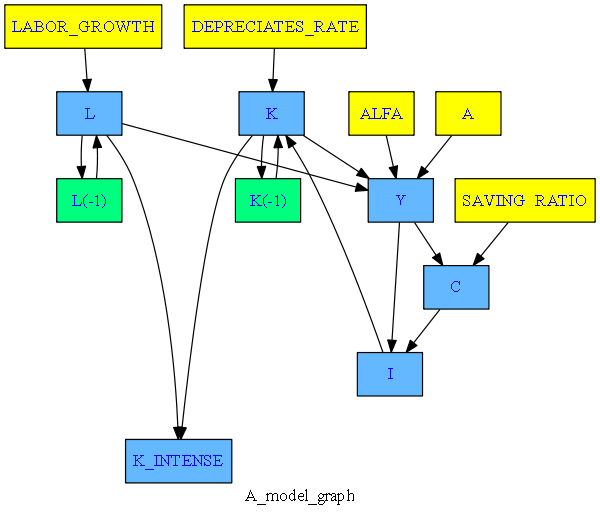

In [4]:
msolow.drawmodel(sink = 'K_INTENSE',size=(2,2))

# Show solving structure (only current year)

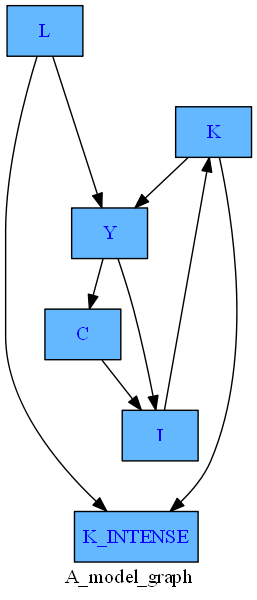

In [5]:
msolow.drawendo(sink = 'K_INTENSE',source='L',size=(2,2))

# Create DataFrame with baseline exogenous 

In [6]:
N = 300
df = pd.DataFrame({'L':[100]*N,'K':[100]*N})
df.loc[:,'ALFA'] = 0.5
df.loc[:,'A'] = 1.
df.loc[:,'DEPRECIATES_RATE'] = 0.05
df.loc[:,'LABOR_GROWTH'] = 0.01
df.loc[:,'SAVING_RATIO'] = 0.05
display(df.head())

,L,K,ALFA,A,DEPRECIATES_RATE,LABOR_GROWTH,SAVING_RATIO
0,100,100,0.5,1.0,0.05,0.01,0.05
1,100,100,0.5,1.0,0.05,0.01,0.05
2,100,100,0.5,1.0,0.05,0.01,0.05
3,100,100,0.5,1.0,0.05,0.01,0.05
4,100,100,0.5,1.0,0.05,0.01,0.05


# Run Baseline

In [7]:
res1 = msolow(df)
display(res1.head())

,L,K,ALFA,A,DEPRECIATES_RATE,LABOR_GROWTH,SAVING_RATIO,K_INTENSE,C,I,Y
0,100.000000,100.000000,0.5,1.0,0.05,0.01,0.05,0.000000,0.000000,0.000000,0.000000
1,101.000000,100.025580,0.5,1.0,0.05,0.01,0.05,0.990352,95.486029,5.025580,100.511609
2,102.010000,100.076226,0.5,1.0,0.05,0.01,0.05,0.981043,95.986562,5.051924,101.038487
3,103.030100,100.151443,0.5,1.0,0.05,0.01,0.05,0.972060,96.501546,5.079029,101.580575
4,104.060401,100.250762,0.5,1.0,0.05,0.01,0.05,0.963390,97.030930,5.106891,102.137821


# Create interactive widgets 
If you are not familiar with Python and Ipywidgets, don't try to understand the code. 
Just notice that it is fairly short. 

You can try different parameter values

In [8]:
slidedef =      {'Productivity'     : {'var':'ALFA',             'value': 0.5 ,'min':0.0, 'max':1.0},
                 'DEPRECIATES_RATE' : {'var':'DEPRECIATES_RATE', 'value': 0.05,'min':0.0, 'max':1.0}, 
                 'LABOR_GROWTH'     : {'var':'LABOR_GROWTH',     'value': 0.01,'min':0.0, 'max':1.0},
                 'SAVING_RATIO'     : {'var': 'SAVING_RATIO',    'value': 0.05,'min':0.0, 'max':1.0}
                        }       

input = msolow.inputwidget(basedf=res1,slidedef=slidedef,showout=True,varpat='Y C I K L K_INTENSE')